New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of natural causes like floods, country growth, population explosion etc.Now they need to decide which countries fall in the same range of export and which don’t. They also need to know which countries export is low and can be improved and which countries are performing very well across the years.The data provided right now is across 18 years. What they need is a repeatable solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data across years in less number of variables. 

<b>Objective</b>: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have tobring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance. 

Implementation:<br>
1)Read the data file and check for any missing values<br>
2)Change the headers to country and year accordingly.<br>
3)Cleanse the data if required and remove null or blank values<br>
4)After the EDA part is done, try to think which algorithm should be applied here.<br>
5)As we need to make this across years we need to apply PCA first.<br>
6)Apply PCA on the dataset and find the number of principal components which explain nearly all the variance.<br>
7)Plot elbow chart or scree plot to find out optimal number of clusters. <br>
8)Then try to apply K means, Hierarchical clustering and showcase the results.  <br>
9)You can either choose to group the countries based on years of data or using the principal components<br>
10)Then see which countries are consistent and which are largest importers of the good based on scale and position of cluster.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("C:/Users/91758/Desktop/Project_Data_2.csv",thousands=',')

In [25]:
df.head()

,Sales of Wheat in tons,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
3,American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
4,Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
Sales of Wheat in tons    207 non-null object
1990                      207 non-null int64
1991                      207 non-null int64
1992                      207 non-null int64
1993                      207 non-null int64
1994                      207 non-null int64
1995                      207 non-null int64
1996                      207 non-null int64
1997                      207 non-null int64
1998                      207 non-null int64
1999                      207 non-null int64
2000                      207 non-null int64
2001                      207 non-null int64
2002                      207 non-null int64
2003                      207 non-null int64
2004                      207 non-null int64
2005                      207 non-null int64
2006                      207 non-null int64
2007                      207 non-null int64
dtypes: int64(18), object(1)
memory usa

In [ ]:
dft= df.T

In [29]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
Sales of Wheat in tons,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419


In [30]:
new_header= dft.iloc[0]
dft=dft[1:]
dft.columns= new_header

In [31]:
dft.head()

Sales of Wheat in tons,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,436,42,45,42,39,514,38,16,96,52,...,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,...,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,...,33,102,259,44,358,64,54,263,494,415
1993,415,42,43,18,33,512,37,14,82,55,...,32,118,250,43,354,174,52,253,526,419
1994,407,42,43,17,32,510,36,13,78,60,...,31,116,242,42,350,172,52,250,556,426


In [32]:
dft['Niue']=dft['Niue'].replace(0,dft['Niue'].mean())

In [35]:
dft['Tokelau']=dft['Tokelau'].replace(0,dft['Tokelau'].mean())

In [36]:
dft['American Samoa']=dft['American Samoa'].replace(0,dft['American Samoa'].mean())

In [54]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 3) 
X_train = pca.fit_transform(dft)

In [55]:
explained_variance = pca.explained_variance_ratio_ 

In [56]:
explained_variance

array([0.73629639, 0.14327014, 0.02670948])

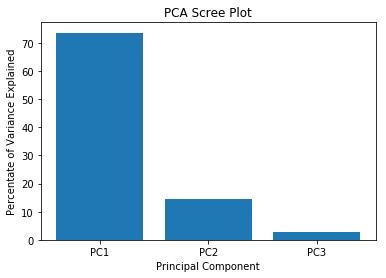

In [57]:
percent_variance = np.round(explained_variance* 100, decimals =2)
columns = ['PC1', 'PC2','PC3']
plt.bar(x= range(0,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [44]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dft)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans.cluster_centers_

array([[ 417.66666667,   41.66666667,   43.5       ,   19.5       ,
          34.33333333,  511.83333333,   36.83333333,   14.16666667,
          84.5       ,   55.83333333,    7.        ,   15.83333333,
          62.33333333,   53.        ,  105.16666667,  603.16666667,
           7.        ,   65.66666667,   15.        ,   60.33333333,
         133.16666667,    9.        ,  781.66666667,  340.83333333,
         149.5       ,  349.16666667,  111.66666667,   27.33333333,
          91.        ,   52.83333333,  213.83333333,  300.33333333,
         869.83333333,  196.66666667,    6.5       ,  423.16666667,
           9.        ,  344.5       ,  286.33333333,   36.83333333,
         313.        ,   80.5       ,  162.83333333,  238.16666667,
          28.5       ,   26.66666667,  117.83333333,   25.5       ,
          12.33333333,   21.5       ,  307.        ,  808.16666667,
         341.16666667,   10.66666667, 1443.66666667,   23.33333333,
         160.83333333,  254.5       ,   46.     

In [60]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])